# Data Understanding

**Feature overview**

**Categorical.**
* Nominal: Name, Survived, Sex, Embarked, PassengerId.
* Ordinal: Pclass.

**Numerical.**
* Continous: Age, Fare.
* Discrete: SibSp, Parch.


**Mixed data types.** 
* Ticket, Cabin.


**Errors, Typos and Anomalies:** Name.

**Blank, Null and Empty:** Cabin, Age, Embarked.


**Distribution of numerical features.**
* Survived - 38% of samples survived. (percentiles=[.61, .62]). 
* Pclass - 55% of passengers were third class. (percentiles=[.44, .45]).
* Age - Few elderly passengers (<1%) within age range 65-80. (percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]).
* SibSp - Nearly 30% of the passengers had siblings and/or spouse aboard. (percentiles=[.68, .69]).
* Parch - Most passengers (> 75%) did not travel with parents or children. (percentiles=[.75, .8]).
* Fare - Fares varied significantly with few passengers (<1%) paying as high as $512. (percentiles=[.1, .2, .3, .4, .5, .6, .7 .8, .9, .99]).


**Distribution of categorical features.**
* Names - no duplicates (count=unique=891).
* Sex - 65% male (top=male, freq=577/count=891).
* Ticket - duplicates (unique=681).
* Cabin - duplicates, shared cabins (unique=147, B96 B98 four times).
* Embarked - Southampton port is the most used (top=S).





**Observations.**

**Survived:** Target column.

**PassengerId:** Identify Passenger like Name but does not contribute to our objective.

**Name:** Name titles can useful for classification.

**Ticket:** Mixed data types with many duplicates does not seem to contribute to survival.

**Cabin:** Few entries (total = 204) with duplicates and shared with passengers. 

**Sex:** High survival rate of women (female = 0.74).

**Pclass:** Significant survival rate (Pclass_1 > 0.5).

**Parch and SibSP:** Uncertain survival rate and most passengers traveled alone.

**Embarked:** Ports had different survival rates.

**Age:** Kids with 5 or less years old and women had a high survival rate. Presence of outliers

**Fare:** Passengers with Fare less than 50.000 had high death rate. Presence of outliers

**Decisions.**

**Correcting.** 
1. Drop Passengerid because does not contribute to survival.
2. Drop Cabin because is incomplete.
3. Drop Ticket because has duplicates and mixed data types.

**Completing.** 
1. Complete Age and Embarked for null values.

**Creating.** 
1. Combine Parch and SibSp to create Family feature.
2. Extract title from Name to create Title feature.
3. Transform Age and Fare in an ordinal feature.

**Converting.**
1. Convert object datatypes to categorical dummy variables.

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
from IPython.display import display

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# load data
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# combine to run certain operations on both datasets together
combine = [train_df, test_df]

In [3]:
# noting the feature names for directly manipulating or analyzing these
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S


In [6]:
# indentify data types and blank, null or empty values
train_df.info()
print('_'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [7]:
# add `percentiles=[.61, .62]` as argument to know how percentages work.
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


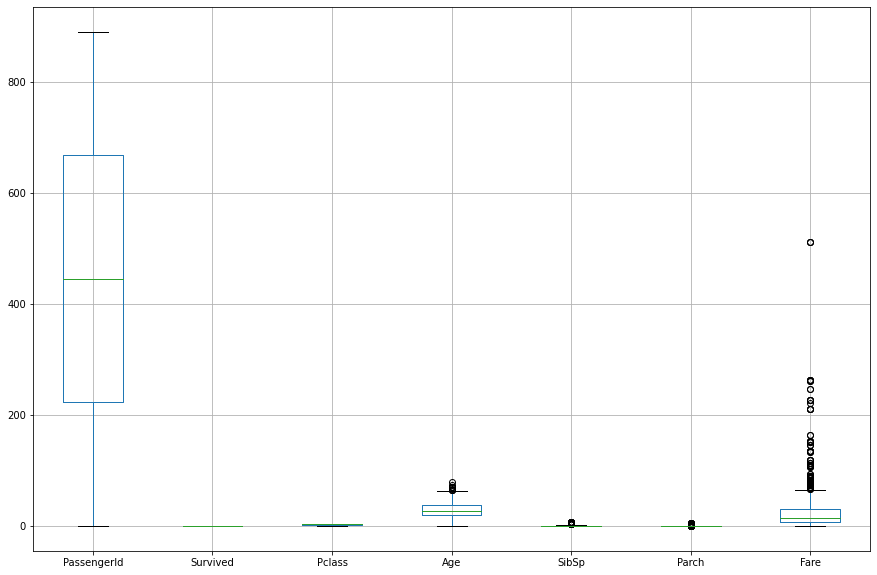

In [9]:
train_df.boxplot(figsize=(15,10))
plt.show()

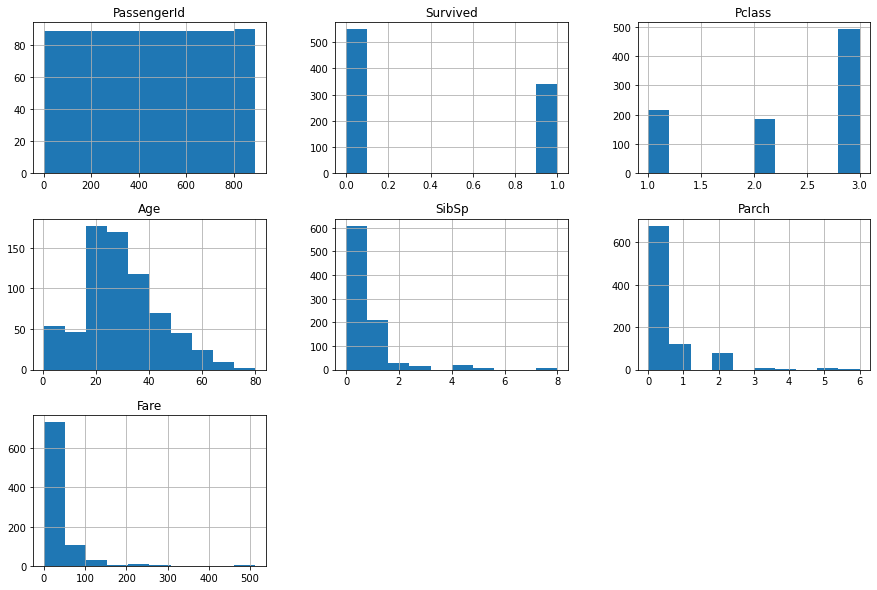

In [10]:
train_df.hist(figsize=(15,10))
plt.show()

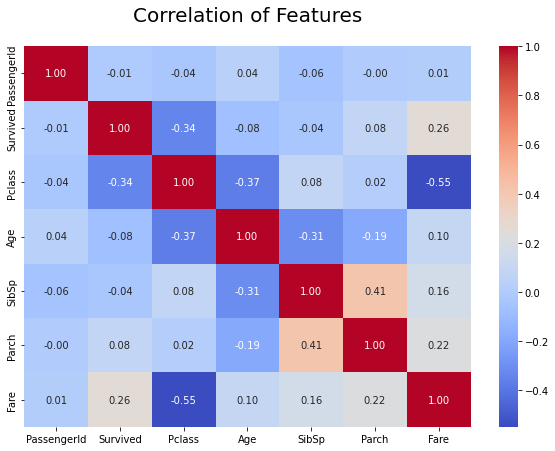

In [11]:
plt.figure(figsize=(10,7))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(train_df.corr(), annot=True, fmt = ".2f",cmap='coolwarm')
plt.show()

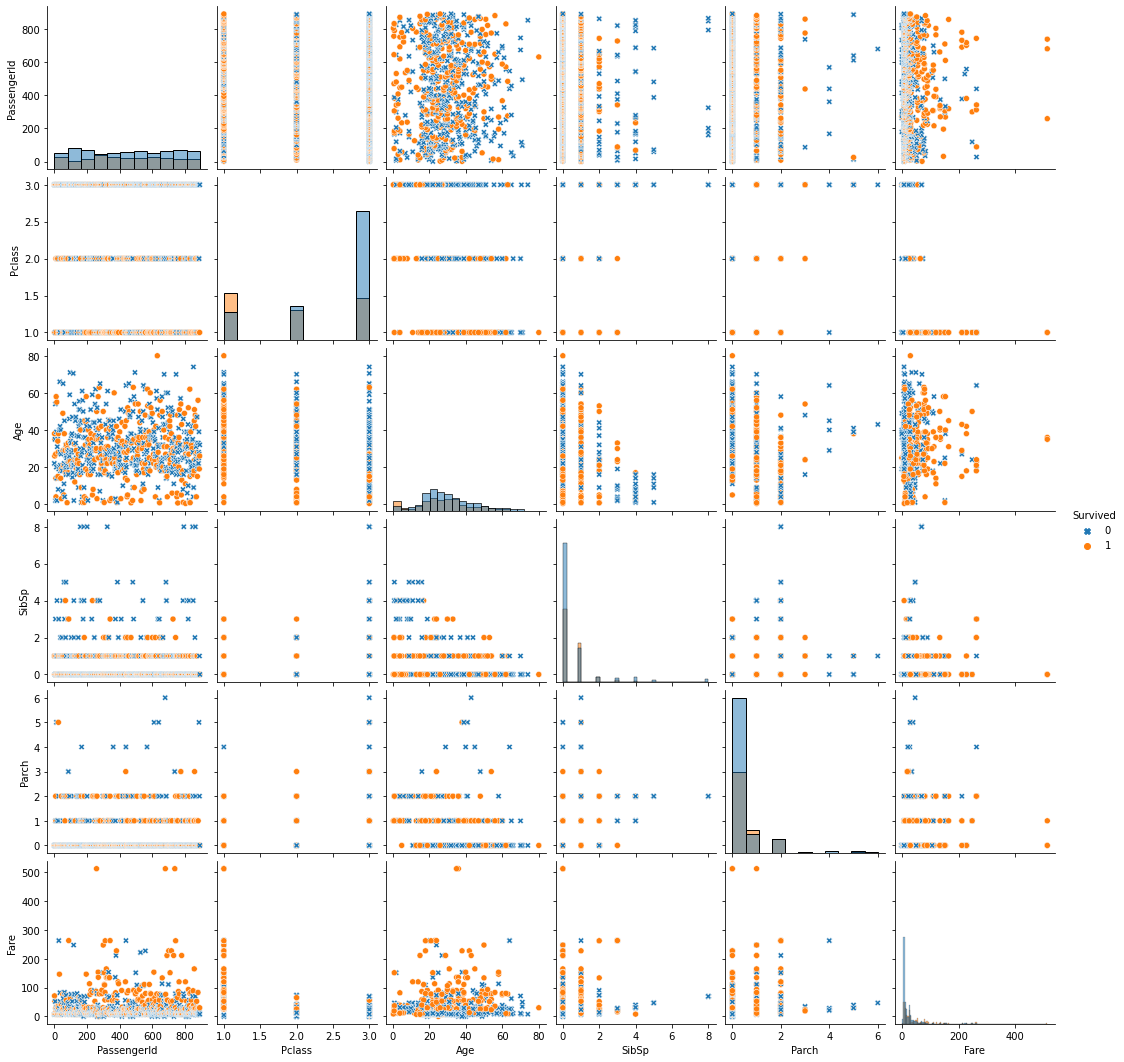

In [12]:
sns.pairplot(train_df,hue="Survived",kind="scatter",diag_kind="hist", markers=["X","o"])
plt.show()

In [13]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
pd.crosstab([train_df.SibSp,train_df.Survived],train_df.SibSp,margins=True).style.background_gradient(cmap='gray_r')

In [17]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [18]:
pd.crosstab([train_df.Parch,train_df.Survived],train_df.Parch,margins=True).style.background_gradient(cmap='gray_r')

In [19]:
train_df[["Embarked","Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


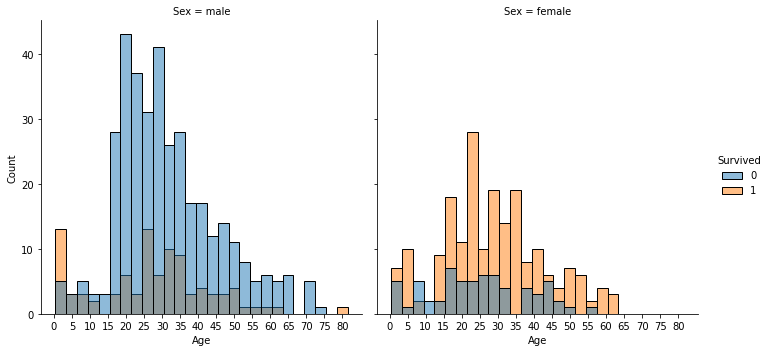

In [20]:
sns.displot(data=train_df, x="Age", col='Sex',hue="Survived",binwidth=3)
plt.xticks(np.arange(0, max(train_df.Age)+1, 5))
plt.show()

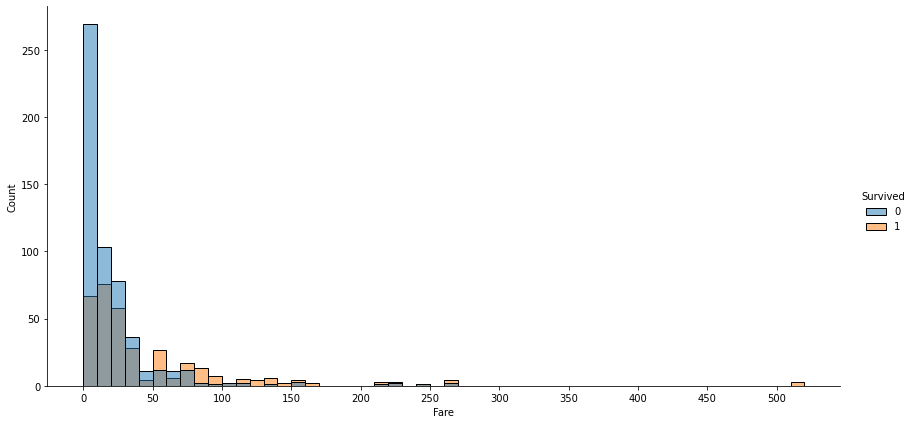

In [21]:
sns.displot(data=train_df, x="Fare", hue="Survived",binwidth=10,aspect = 2,height = 6)
plt.xticks(np.arange(min(train_df.Fare), max(train_df.Fare)+1, 50))
plt.show()

In [22]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


# Data Preparation

# Modeling

In [23]:
y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
